# Scenario
Turtle Games is a game manufacturer and retailer with a global customer base. The company manufactures and sells its own products, along with sourcing and selling products manufactured by other companies. Its product range includes books, board games, video games, and toys. The company collects data from sales as well as customer reviews. Turtle Games has a business objective of improving overall sales performance by utilising customer trends. 

To improve overall sales performance, Turtle Games has come up with an initial set of questions. You’ll explore these questions in greater depth through the weekly assignment activities. Turtle Games wants to understand: 
•	how customers accumulate loyalty points
•	how groups within the customer base can be used to target specific market segments 
•	how social data (e.g. customer reviews) can be used to inform marketing campaigns
•	the impact that each product has on sales
•	how reliable the data is (e.g. normal distribution, skewness, or kurtosis)
•	what the relationship(s) is/are (if any) between North American, European, and global sales.


## Weekly Assignment 1 - Linear regression

In [1]:
# Import necessary libraries, packages and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn 

# Import modules from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS

# Import modules from sklearn.
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
# Import data
reviews = pd.read_csv(r'/Users/diegoreineck/Library/Mobile Documents/com~apple~CloudDocs/University/LSE/Course 3 - Advanced analytics for organisational impact/Course 3 - Assignment/LSE_DA301_assignment_files/turtle_reviews.csv')

# Preview the data
print(reviews.shape)
print(reviews.dtypes)
print(reviews.info())
reviews.head()

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform    

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Summary of descriptive statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [4]:
# Remove redundant columns.

#reviews = reviews.drop(columns = ['language', 'platform'])

reviews = reviews.rename(columns = {'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})
# Rename columns
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Save a copy of the clean DataFrame.

reviews_copy = reviews

### Conduct linear regression

#### Evaluating linear relationship between age and loyalty points

R-squared is:  0.0018015480437203468
Intercept is:  [1736.5177394]
Coefficient is:  [[-4.01280515]]


Text(0, 0.5, 'Loyalty score')

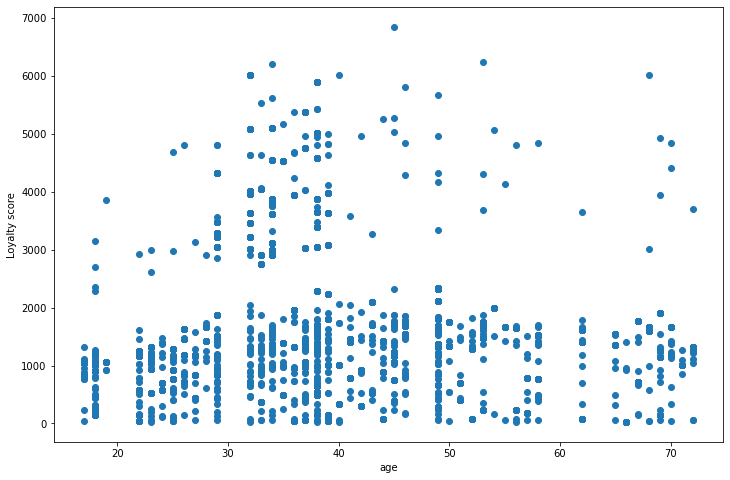

In [6]:
# Define x and y variables.

x_age = reviews['age'].values.reshape(-1,1)

y_loyalty = reviews['loyalty_points'].values.reshape(-1,1)

# Set lineare regression.
lm = LinearRegression()

# Fit the values to the linear regression.
lm.fit(x_age,y_loyalty)

# Print R-square, coefficient and intercept
print('R-squared is: ', lm.score(x_age,y_loyalty))
print('Intercept is: ', lm.intercept_)
print('Coefficient is: ', lm.coef_)


# Plot the variables
plt.figure(figsize=(12,8))

plt.scatter(x_age,y_loyalty) # Create scatter plot.

plt.xlabel('age')
plt.ylabel('Loyalty score')

In [7]:
# Create an OLS model.

model_1 = sm.OLS(y_loyalty, sm.add_constant(x_age)).fit() 

print_model_1 = model_1.summary() # Call summary of the model.

print(print_model_1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 10 Sep 2022   Prob (F-statistic):             0.0577
Time:                        10:00:43   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

Comment: 
R squared is = 0.002. Only 0.2% of the model can explain the variation in loyalty score depending on the variation of age.
Coefficient has a value of -4.0128, with a p-value = 0.058. Hence it is not statistically significant.

Text(0, 0.5, 'Loyalty score')

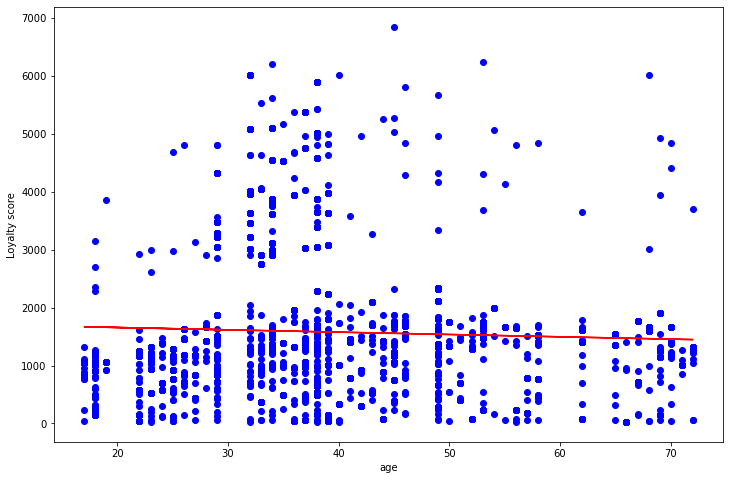

In [17]:
# Predict values and plot predicted values

y_loyalty_a_predi = lm.predict(x_age)

# Plot values.

plt.figure(figsize=(12,8))

plt.scatter(x_age,y_loyalty, color = 'blue') # Create scatter plot.
plt.plot(x_age, y_loyalty_a_predi, color = 'red')

plt.xlabel('age')
plt.ylabel('Loyalty score')


Comment: 
Age is given as an integer, therefore difficult to make predictions when independent values are not floats.
Generally we can see that that the older the person, the lower the loyalty score.

#### Evaluating linear relationship between remuneration and loyalty points

R-squared is:  0.3795357732793634
Intercept is:  [-65.6865128]
Coefficient is:  [[34.18782549]]


Text(0, 0.5, 'Loyalty score')

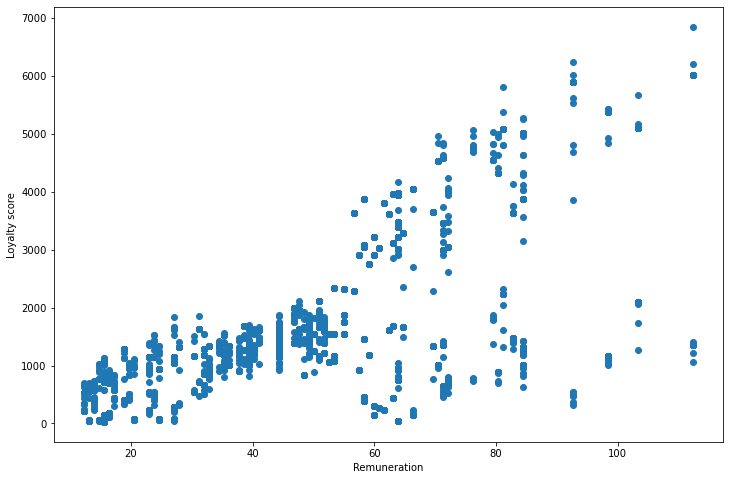

In [21]:
# Define x and y variables.

x_remun = reviews['remuneration'].values.reshape(-1,1)

y_loyalty = reviews['loyalty_points'].values.reshape(-1,1)

# Set lineare regression.
lm = LinearRegression()

# Fit the values to the linear regression.
lm.fit(x_remun,y_loyalty)

# Print R-square, coefficient and intercept
print('R-squared is: ', lm.score(x_remun,y_loyalty))
print('Intercept is: ', lm.intercept_)
print('Coefficient is: ', lm.coef_)


# Plot the variables
plt.figure(figsize=(12,8))

plt.scatter(x_remun,y_loyalty) # Create scatter plot.

plt.xlabel('Remuneration')
plt.ylabel('Loyalty score')

In [20]:
# Create an OLS model.

model_2 = sm.OLS(y_loyalty, sm.add_constant(x_remun)).fit() 

print_model_2 = model_2.summary() # Call summary of the model.

print(print_model_2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          2.43e-209
Time:                        15:43:51   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.6865     52.171     -1.259      0.2

Comment: 
The R-squarred value is 0.38, 38% of the model can explain a variation in the loyalty score depending on a variation in remuneration. 
Coefficient (m) has a value of 34.18 and p-value of <0.05 therefore we can conclude that this value is statistically significant.

Text(0, 0.5, 'Loyalty score')

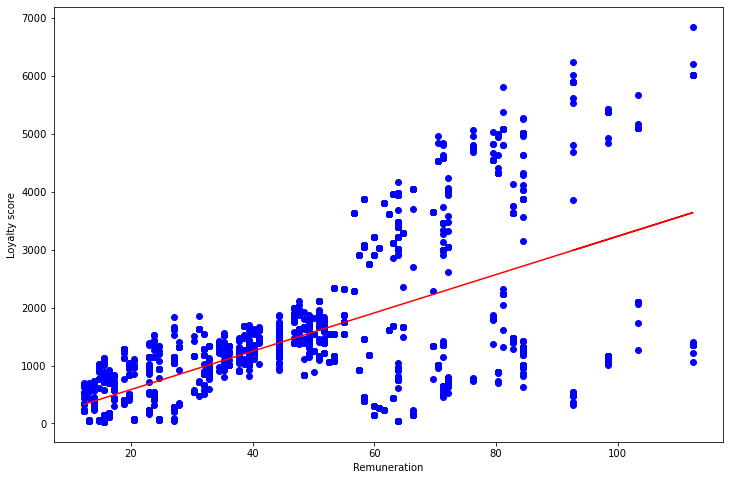

In [30]:
# Predict values and plot predicted values

y_loyalty_re_predi = lm.predict(x_remun)

# Plot values.

plt.figure(figsize=(12,8))

plt.scatter(x_remun,y_loyalty, color = 'blue') # Create scatter plot.
plt.plot(x_remun, y_loyalty_re_predi, color = 'red')

plt.xlabel('Remuneration')
plt.ylabel('Loyalty score')



#### Evaluating linear relationship between spending score and loyalty points

R-squared is:  0.4520008865838909
Intercept is:  [-75.05266293]
Coefficient is:  [[33.06169326]]


Text(0, 0.5, 'Loyalty score')

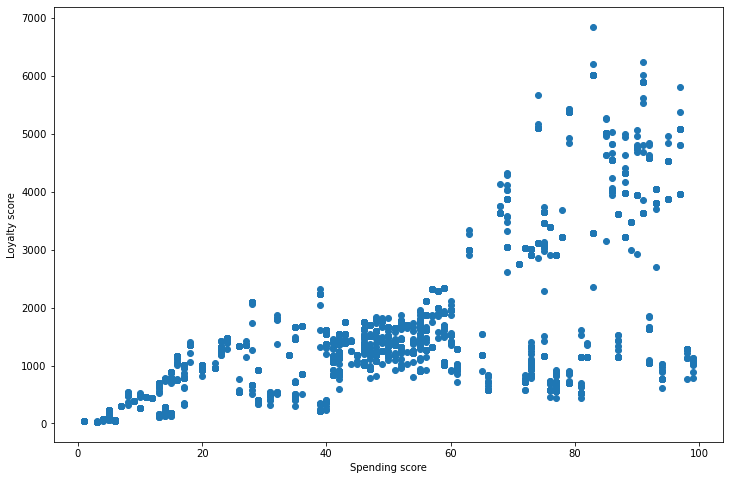

In [26]:
# Define x and y variables.

x_spend = reviews['spending_score'].values.reshape(-1,1)

y_loyalty = reviews['loyalty_points'].values.reshape(-1,1)

# Set lineare regression.
lm = LinearRegression()

# Fit the values to the linear regression.
lm.fit(x_spend,y_loyalty)

# Print R-square, coefficient and intercept
print('R-squared is: ', lm.score(x_spend,y_loyalty))
print('Intercept is: ', lm.intercept_)
print('Coefficient is: ', lm.coef_)


# Plot the variables
plt.figure(figsize=(12,8))

plt.scatter(x_spend,y_loyalty) # Create scatter plot.

plt.xlabel('Spending score')
plt.ylabel('Loyalty score')

In [28]:
# Create an OLS model.

model_3 = sm.OLS(y_loyalty, sm.add_constant(x_spend)).fit() 

print_model_3 = model_3.summary() # Call summary of the model.

print(print_model_3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          2.92e-263
Time:                        15:51:31   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.0527     45.931     -1.634      0.1

Comment: 
R-squarred value is 0.452, thus the model is capable of explaining up to 45.2% of the variation in loyalty score due to variation in spending score. 

Coefficient (m) has a value of 33.0167 and a p-value less than 0.05 thus we can reject the null hypothesis state the coefficient is statistically significant.

Text(0, 0.5, 'Loyalty score')

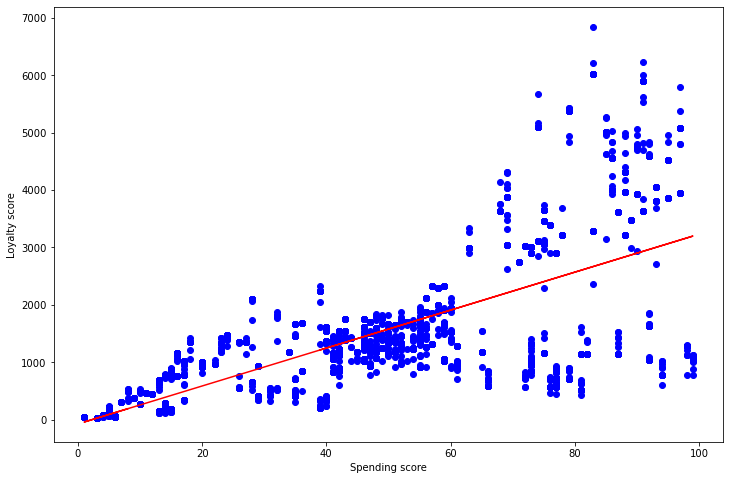

In [31]:
# Predict values and plot predicted values

y_loyalty_spe_predi = lm.predict(x_spend)

# Plot values.

plt.figure(figsize=(12,8))

plt.scatter(x_spend,y_loyalty, color = 'blue') # Create scatter plot.
plt.plot(x_spend, y_loyalty_spe_predi, color = 'red')

plt.xlabel('Spending score')
plt.ylabel('Loyalty score')




### Conduct multilinear regression

Evaluating the relationship between loyalty points and age/remuneration and spending scores.

In [32]:
# Define x and y variables.

X = reviews[['age', 'remuneration', 'spending_score']]

y = reviews['loyalty_points']

# set up multilinear regression

mlr = LinearRegression()

# Fit the linear regression
mlr.fit(X,y)

# Print coefficient and intercept and R-square

print('R-squared is: ', mlr.score(X,y))
print('Intercept is: ', mlr.intercept_)
print('Coefficient is: ', mlr.coef_)

list(zip(X, mlr.coef_)) # Map a similar index of multiple containers (to be used as a single entity)




R-squared is:  0.8399114912748795
Intercept is:  -2203.059751307901
Coefficient is:  [11.06065871 34.00838549 34.18319658]


[('age', 11.060658711843349),
 ('remuneration', 34.00838549260249),
 ('spending_score', 34.18319657763366)]

Comment: 
At a first glance, we can see that R-squarred value is very high, capable of explaining 83.9% of the variation in loyalty score from a variation in age, remunaration and spending score.
It is also interesting to see that age remuneration and spending score have similar coefficient values.

In [34]:
# Set up train and tests subste data.
# 80% train and 20% test

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.20, random_state = 5)

In [35]:
# Run regression on train data

mlr.fit(X_train, Y_train)

# print values and coefficients and R-squared

print('R-squared of trained data is: ', mlr.score(X_train,Y_train))
print('Intercept  of trained data isis: ', mlr.intercept_)
print('Coefficient of trained data is: ', mlr.coef_)

list(zip(X_train, mlr.coef_)) # Map a similar index of multiple containers (to be used as a single entity)

R-squared of trained data is:  0.8349759233661147
Intercept  of trained data isis:  -2203.341083362776
Coefficient of trained data is:  [10.93497495 33.66118028 34.26609885]


[('age', 10.934974945934975),
 ('remuneration', 33.661180284074725),
 ('spending_score', 34.26609885437093)]

Comment: 
Value found from the training sample are not too different from the original data sets.

In [36]:
# Make predictions using train data sets
mlr.predict(X_train)

array([ 1362.93474067,   767.56846704,  2292.11541031, ...,
        1416.57825601, -1096.31139624,  1531.78396384])

#### Check the model with OLS

In [37]:
# define the model

model_4 = sm.OLS(Y_train, sm.add_constant(X_train)).fit() # Fit model with added constant.

Y_pred = model_4.predict(sm.add_constant(X_test)) # Set predicted response vector.

print_model_4 = model_4.summary() # Call summary of the model.

print(print_model_4)



                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2692.
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:29:21   Log-Likelihood:                -12227.
No. Observations:                1600   AIC:                         2.446e+04
Df Residuals:                    1596   BIC:                         2.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.3411     58.253    -37.

/Users/diegoreineck/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Comment: 

R-squarred value is 83.5%, model can explain 83.5% of variation in dependent variable from the variation in the independent variables.

Age has the lowest t statistics value, nevetheless all coefficients have a p-value lower than 0.05 therefore it can be inferred that they are statistically significant.

In [38]:
# perform the regression on the test subset

mlr.fit(X_test, Y_test)

# print values and coefficients and R-squared

print('R-squared of trained data is: ', mlr.score(X_test,Y_test))
print('Intercept  of trained data isis: ', mlr.intercept_)
print('Coefficient of trained data is: ', mlr.coef_)

list(zip(X_test, mlr.coef_)) # Map a similar index of multiple containers (to be used as a single entity)


# re-run the linear regression

mlr  = LinearRegression()
mlr.fit(X_test,Y_test) # fit the model
y_pred_mlr = mlr.predict(X_test)

print('Prediction for the test set: {}'.format(y_pred_mlr)) # print the predicted Y values

R-squared of trained data is:  0.8578097244705075
Intercept  of trained data isis:  -2205.304059105444
Coefficient of trained data is:  [12.00160306 35.27867595 33.69255881]
Prediction for the test set: [ 1451.30317656  3505.47445843  1728.76969979  1839.11809746
   889.93888979  1174.86939462  3507.17397409  1213.98217229
  3332.57014711  2257.10682702  -168.89695143   552.87513293
   282.93637564  1016.53630455  1359.95829245  1876.30631149
  -105.87896667  1733.41592031  3294.47951067  2053.07957507
  1690.47436009  2123.96034792  1479.03768592  -665.28447513
  4525.69380777  3073.24625985  3515.50805823  1387.1544515
  -355.85585351  1412.00741544  1517.2692413   4767.94201503
  1436.46346772  3942.68200487  1367.37883443  1967.73618004
   133.22895223   522.39724687  2205.98184624   750.54552894
  1575.70616498   883.43326508  1167.35274844  1733.41592031
  -785.55787352  1408.88884689  1152.97373559  1496.3194443
  -880.20430964  2050.54417156  1398.14503309  -762.47880963
  3063

#### Checking for multicollinearity

In [39]:
# Add a constant
x_temp = sm.add_constant(X_train)

# create empty DataFrame
vif = pd.DataFrame()

# Calculate the variance inflation factor
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.shape[1])]

# Create feature column
vif['features'] = x_temp.columns

# print vif

print(vif.round(2))

   VIF Factor        features
0       21.29           const
1        1.05             age
2        1.00    remuneration
3        1.06  spending_score


/Users/diegoreineck/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Comment: 

The VIF factor is low for each coefficient factor, therefore we can assume that there is no multicollinearity between the different independent variables.

In [40]:
# Get metrics to judge how good or poor our models are.

print("Mean Absolute error (Final)", metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared error (Final)', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute error (Final) 425.48679627595675
Mean Squared error (Final) 301956.0390785325


Comment:
Mean absolute error and mean absolute score are quite high, hence there is a difference between predicted and observed loyalty points. Nevertheless, these could be influenced by outliers.

#### Check for Homoscedasticity

In [44]:
# Run Breusch-Pegan test
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit() # Fit model with added constant.

model = sms.het_breuschpagan(model.resid, model.model.exog)  

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))


{'LM stat': 30.386096853867883, 'LM Test p-value': 1.1446326520923542e-06, 'F-stat': 10.298968105376614, 'F-test p-value': 1.026336544830792e-06}


Comment: 
p-value is lower than 0.05 therefore we have to reject the null hypothesis and state that the data sets shows heteroscedasticity.
Rediduals are not distributed with equal variance.



## Weekly Assignment 2 - Clustering

### Objective: 
The marketing department also wants to better understand the usefulness of remuneration and spending scores in providing data for analysis but does not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. 

Use k-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

In [12]:
# Import libraries for clustering 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import yellowbrick

from sklearn import cluster
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer

# Preview DataFrame

reviews_copy.head()

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [13]:
# Create sub-data set.
df2 = reviews_copy[['remuneration', 'spending_score']]

# Get info of df2. 
print(df2.info())

# Descriptive statistics
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
       remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000


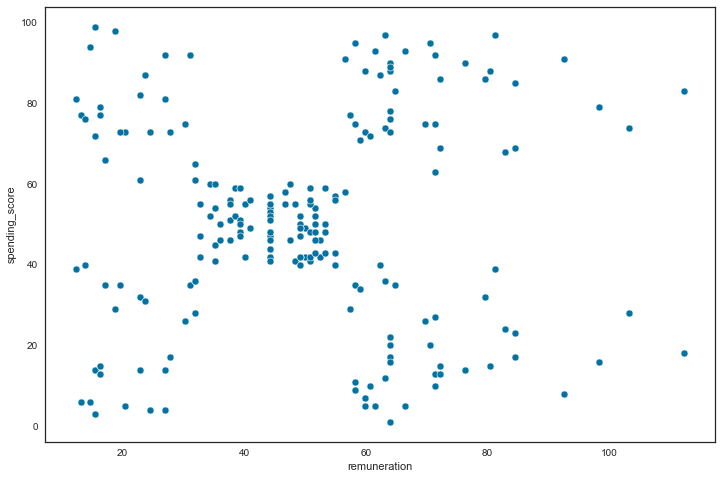

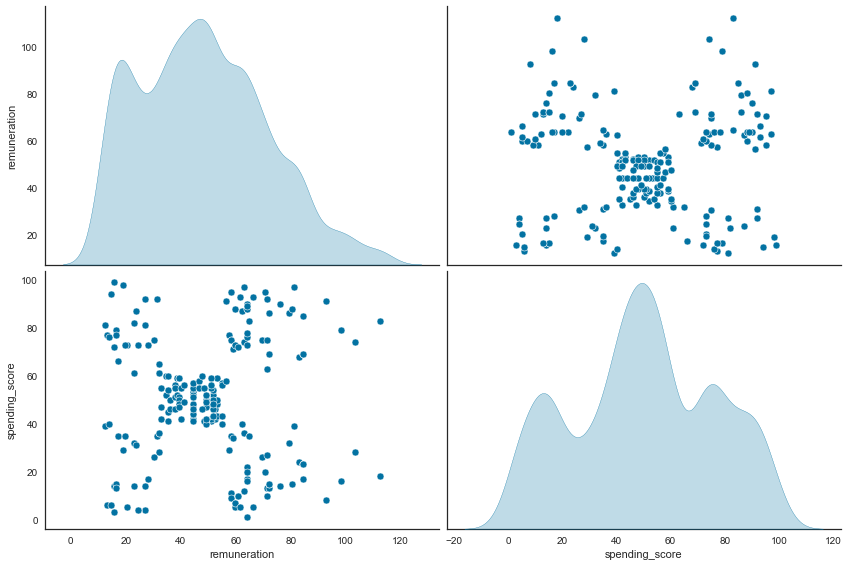

In [14]:
# Visualise both data sets using scatter plot and pairplots.

plt.figure(figsize=(12,8))

# Create scatter plot
sns.set_style("ticks")
sns.scatterplot(data = df2, x = 'remuneration', y = 'spending_score')

# Create pairplot.

# Set variables to be displayed
x = df2[['remuneration', 'spending_score']]

# Create pairplot.
sns.pairplot(data = df2, x_vars = x, diag_kind = 'kde', height = 4, aspect = 1.5)

Observation: 

At a glance we cann see that the distribution of remuneration is slighlty skewed to the left. 
Whereas the distribution of spending score resembles a bit more the one of a normal distribution.

From the scatter plot, it can be seenn that there are 5 clusters of data. A central one at the 50/50 mark and then four others at the "top/bottom" corners of the scatter plot.


(0.060899010751727586, 0.0009999999999998899)


/Users/diegoreineck/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


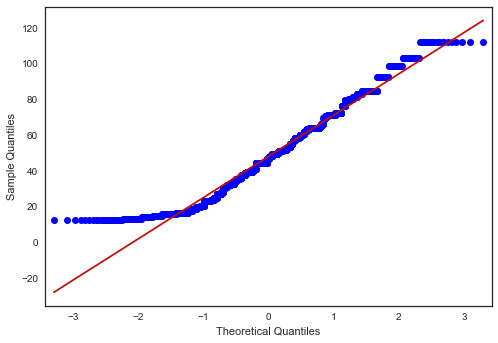

In [39]:
# Verify wehther the data sets come from a normal distribution.
import scipy as scp
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# create QQ plot
qqplot(df2['remuneration'], line = 's')

# Apply Lilliefors’ test
import statsmodels.api as sm
print(sm.stats.diagnostic.kstest_normal(x = df2['remuneration'], dist = 'norm'))

Observation for remuneration: 

The qqplot indicates that the distribution is strongly skewed towards the left tail. However, bulk of the data seem to follow normal distribution. 

The Lilliefors’ test is a Kolmogorov-Smirnov test with estimated parameters. The first argument returned is the kstest value and the second argument is p-value. In the case of the Lilliefors’ test if p-value is less than p=0.05 then we reject the null hypothesis (data come from a normal distribution) and accept that data do not come froma normal distribution. In this case for the remuneration data p = 0.0009. Thus we conclude that the remuneration data set does not come from a normal distribution.

(0.0724970215042745, 0.0009999999999998899)


/Users/diegoreineck/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


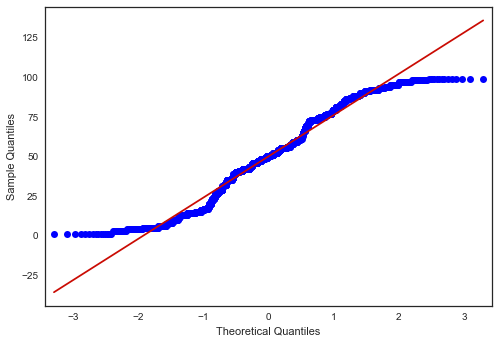

In [38]:
# Verify wehther the data sets come from a normal distribution.
import scipy as scp
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# create QQ plot
qqplot(df2['spending_score'], line = 's')

# Apply Lilliefors’ test
import statsmodels.api as sm
print(sm.stats.diagnostic.kstest_normal(x = df2['spending_score'], dist = 'norm'))

Observation for spending score: 

The qqplot indicates that the distribution is strongly skewed towards the left and right tail. However, bulk of the data seem to follow normal distribution. 

P-value from Lilliefors’ test is p = 0.0009, it is less than p = 0.05. Thus we reject the null hypothesis and conclude that the spending score data do not come from a normal distribution.



### Determine the number of optimal clusters using elbow and silhouette method

#### Elbow method

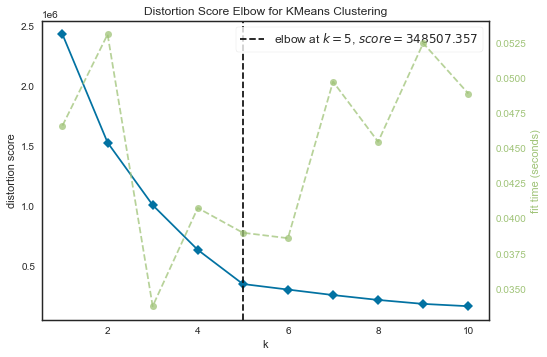

AttributeError: 'KMeans' object has no attribute 'savefig'

In [17]:
#Set parameters of k-means cluster

i = range(1,11)
model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Visualise data using the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1,11)).fit(x)
visualizer.show()



#### Silhouette method

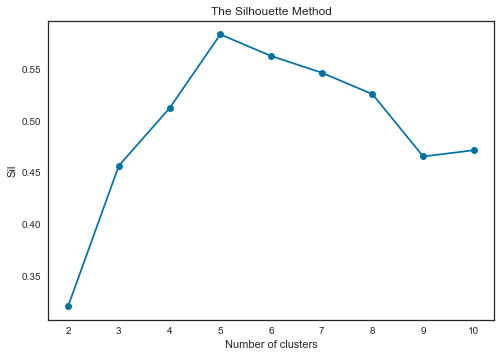

In [59]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Observation: 

From the silhouetter and elbow method. It can be clearly seen that the optimal number of k-clusters is five.

### Fitting and visualising the model

<Figure size 864x576 with 0 Axes>

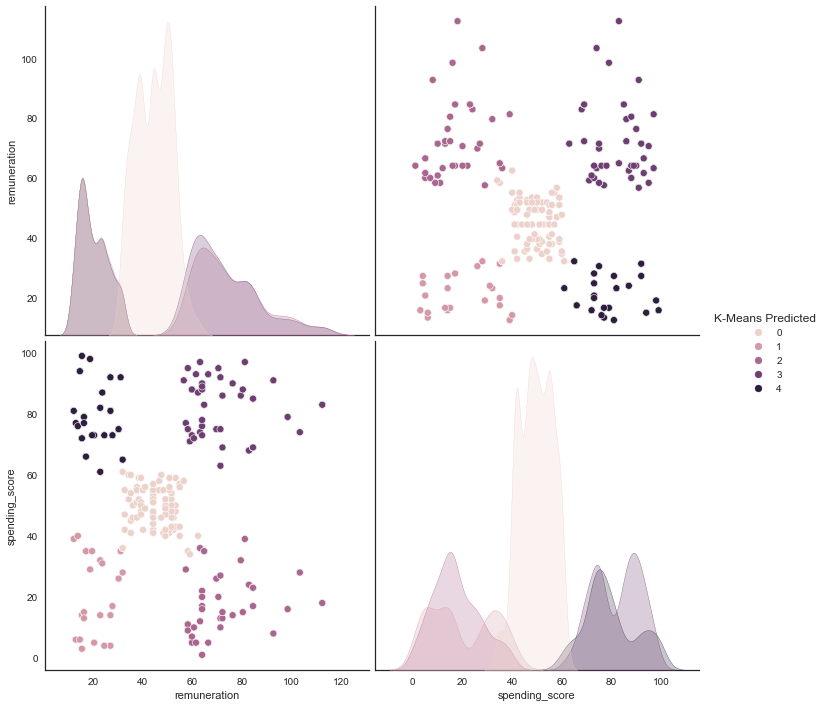

In [18]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
plt.figure(figsize=(12,8))
a = sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde', height=5, aspect=1)



In [19]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

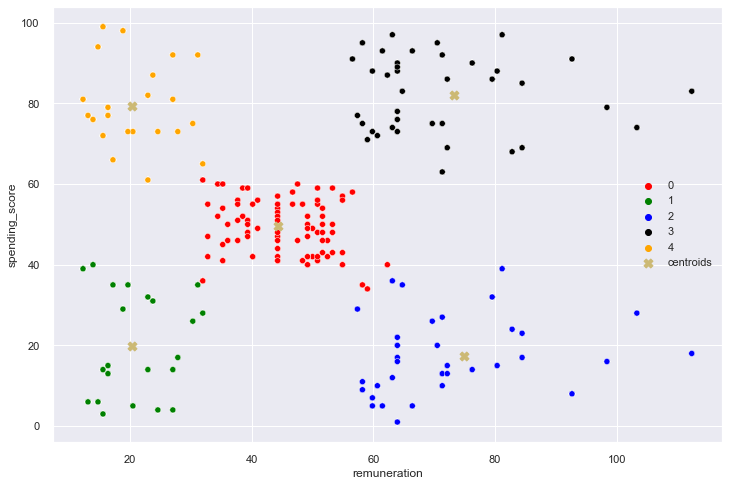

<Figure size 864x576 with 0 Axes>

In [21]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration', y ='spending_score', data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="y", s=80, label="centroids")
plt.legend()
plt.show()

plt.savefig('clusters_visualisation.png')

## Weekly Assignment 3 - Analyse customer sentiments with reviews

### a. Preview the data

In [22]:
# Preview the data.

print(reviews_copy.info())
reviews_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   language        2000 non-null   object 
 7   platform        2000 non-null   object 
 8   product         2000 non-null   int64  
 9   review          2000 non-null   object 
 10  summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [23]:
# Keep only necessary columns.
reviews_summary = reviews_copy[['review', 'summary']]

# View new DataFrame
reviews_summary.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [23]:
# Determine if there are any missing values.
reviews_summary.isna().sum()

review     0
summary    0
dtype: int64

### b. Prepare the data for natural language processing

In [24]:
# change each word to lower case and join each element

# For reviews:
reviews_summary['review'] = reviews_summary['review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

# For summary: 
reviews_summary['summary'] = reviews_summary['summary'].apply(lambda x: ' '.join(x.lower() for x in x.split()))

# View the DataFrame.
reviews_summary.head()


/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_65021/3014626576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_summary['review'] = reviews_summary['review'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_65021/3014626576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_summary['summary'] = reviews_summary['summary'].apply(lambda x: ' '.join(x.lower() for x in x.split()))


,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [25]:
# Remove the punctuation in each column

# For reviews:
reviews_summary['review'] = reviews_summary['review'].str.replace('[^\w\s]','')

# For summary:
reviews_summary['summary'] = reviews_summary['summary'].str.replace('[^\w\s]', '') 

# View DataFrame.
reviews_summary.head()

/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_65021/1766882443.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_summary['review'] = reviews_summary['review'].str.replace('[^\w\s]','')
/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_65021/1766882443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_summary['review'] = reviews_summary['review'].str.replace('[^\w\s]','')
/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_65021/1766882443.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_summary['summary'] = reviews_summary['summary'].str.replace('[^\w\s]', '')
/var/folders/mx/mpfmf2l110d7s

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [26]:
# Verify for duplicate in each columns:
print('Number of duplicates in review column: ',reviews_summary.review.duplicated().sum())
print('Number of duplicates in summary column: ',reviews_summary.summary.duplicated().sum())


Number of duplicates in review column:  50
Number of duplicates in summary column:  649


In [31]:
# Create DataFrame with unique reviews: 
reviews = reviews_summary.drop_duplicates(subset=['review'])

reviews.reset_index(inplace=True)

reviews.info()

reviews1 = reviews['review']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1950 non-null   int64 
 1   review   1950 non-null   object
 2   summary  1950 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.8+ KB


In [32]:
# Create DataFame with unique summary:
summary = reviews_summary.drop_duplicates(subset=['summary'])

summary.reset_index(inplace=True)

summary.info()

summary1 = summary['summary']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1351 non-null   int64 
 1   review   1351 non-null   object
 2   summary  1351 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.8+ KB


In [36]:
summary1.head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### c. Tokenise and create a WordCloud for each columns

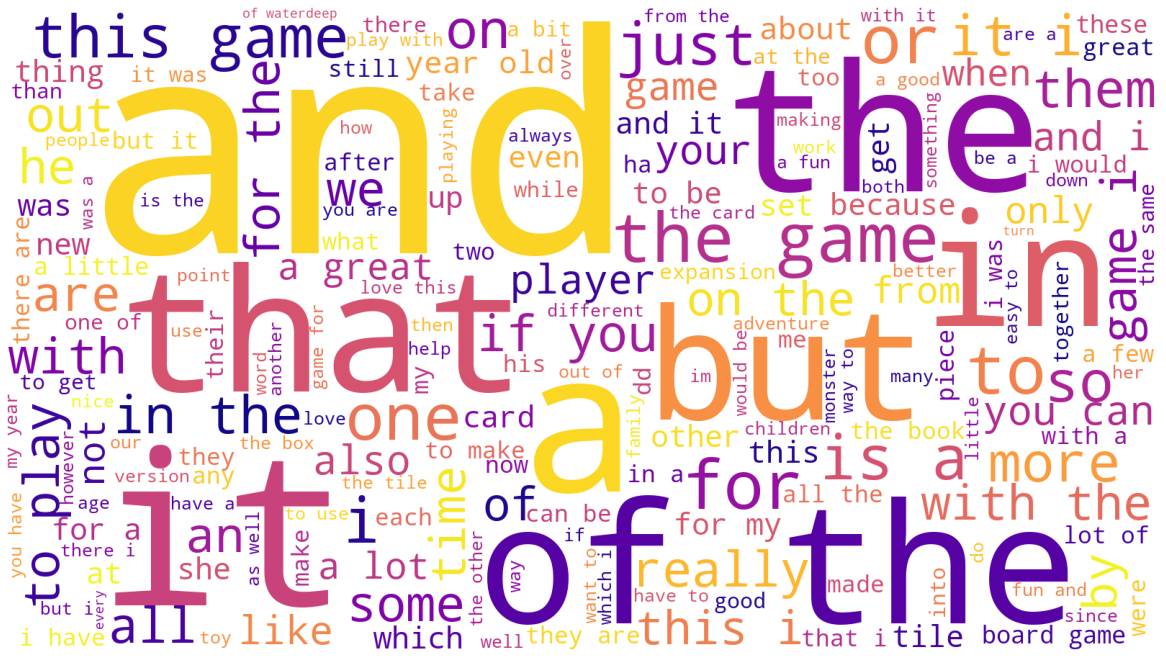

In [39]:
# Ploting a WordCloud for reviews:

# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

# Creat empty string variable
all_reviews = ''

for i in range(reviews.shape[0]):
    # Add each review
    all_reviews = all_reviews + reviews['review'][i]
    

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews)

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()





Observation: 

Displaying unecessary information. Thus stopwords should be removed. See next section.

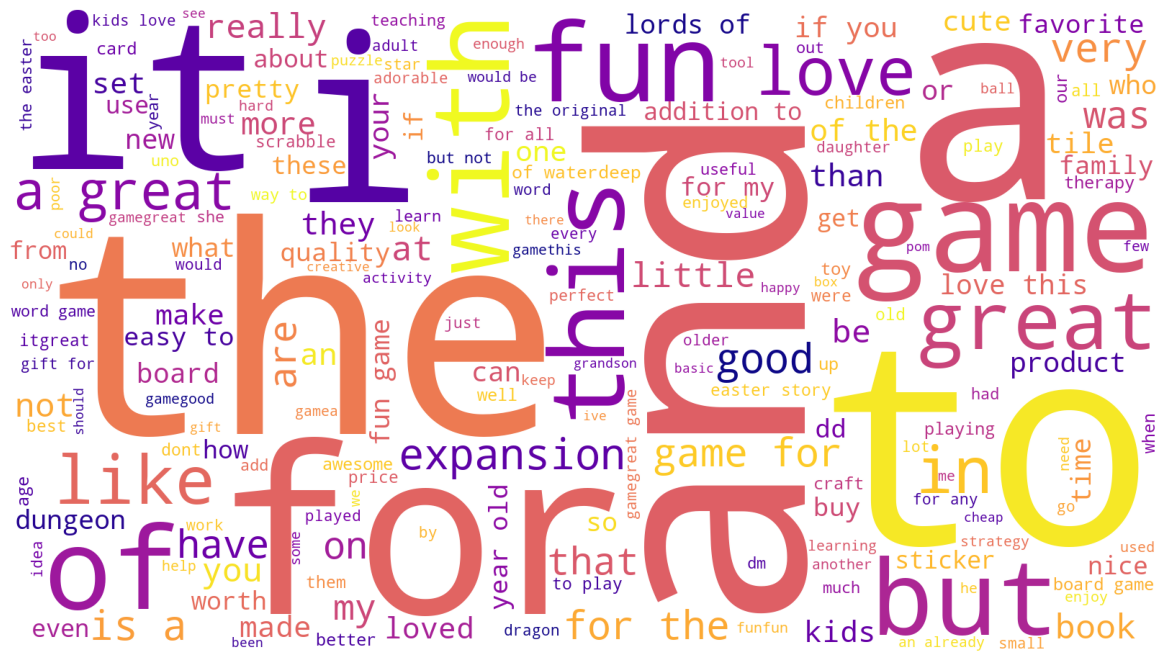

In [40]:
# Ploting WordCloud for summary:

# Create a second empty string variable:
all_summary = ''

for i in range(summary.shape[0]):
    # Add each summary
    all_summary = all_summary + summary['summary'][i]
    
    
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary)

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Observation: 

Displaying unecessary information. Thus stopwords should be removed. See next section.

In [42]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/diegoreineck/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# Tokenise words for review
reviews['tokens_review'] = reviews['review'].apply(word_tokenize)

# Preview data.
reviews['tokens_review'].head()

# Define an empty list of tokens.
all_tokens_review = []

for i in range(reviews.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + reviews['tokens_review'][i]



/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_65021/1185448261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['tokens_review'] = reviews['review'].apply(word_tokenize)


In [45]:
# Tokenise words for summary: 
summary['tokens_summary'] = summary['summary'].apply(word_tokenize)

# Preview data.
summary['tokens_summary'].head()

# Define an empty list of tokens.
all_tokens_summary = []

for i in range(summary.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary +summary['tokens_summary'][i]

/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_65021/779181515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['tokens_summary'] = summary['summary'].apply(word_tokenize)


### d. Determine frequency distribution, polarity and plot word cloud with clean data

In [46]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1_review = [word for word in all_tokens_review if word.isalnum()]

tokens1_summary = [word for word in all_tokens_summary if word.isalnum()]



In [47]:
# Remove the StopWords for review

# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))


# Create a filtered list of tokens without stop words.
tokens2_review = [x for x in tokens1_review if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string_review = ''

for value in tokens2_review:
    # Add each filtered token word to the string.
    tokens2_string_review = tokens2_string_review + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diegoreineck/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Remove Stopwords for summary:

# Create a filtered list of tokens without stop words.
tokens2_summary = [x for x in tokens1_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string_summary = ''

for value in tokens2_summary:
    # Add each filtered token word to the string.
    tokens2_string_summary = tokens2_string_summary + value + ' '


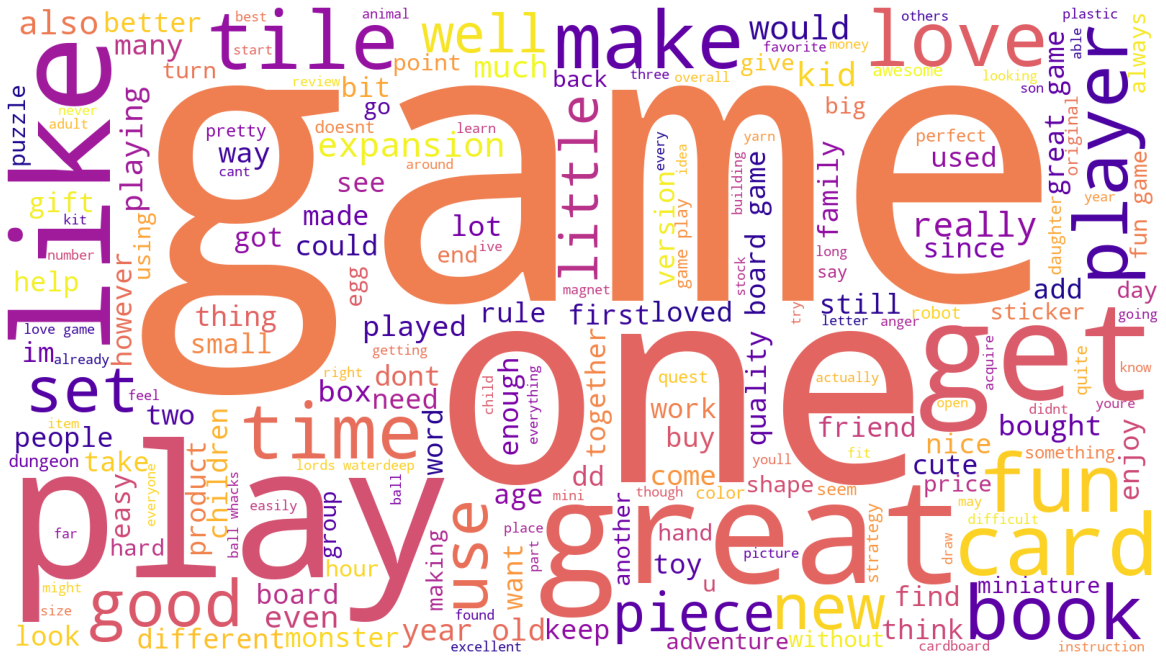

<Figure size 432x288 with 0 Axes>

In [51]:
# Plot WordCloud for reviews.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(tokens2_string_review)

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
plt.savefig('reviews_WordCloud.png', dpi = 900)

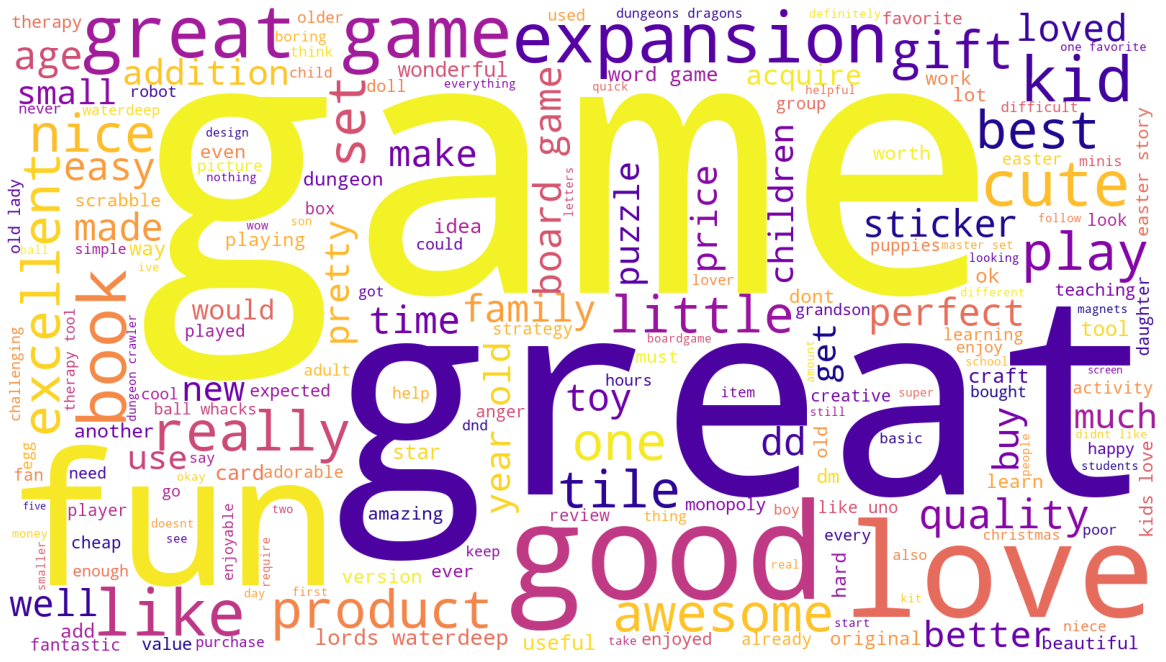

<Figure size 432x288 with 0 Axes>

In [52]:
# Plot WordCloud for summary.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(tokens2_string_summary)

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

plt.savefig('summary_WordCloud.png', dpi=900)

In [53]:
# Calculate the Frequency of most occuring words in reviews.

# Import the FreqDist class.
from nltk.probability import FreqDist

# Create frequency.
fdist_review = FreqDist(tokens2_review)

# Import the Counter class to count 15 most frequent words.
from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens2_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
game,1668
great,579
fun,549
one,530
play,502
like,414
love,322
really,319
get,319


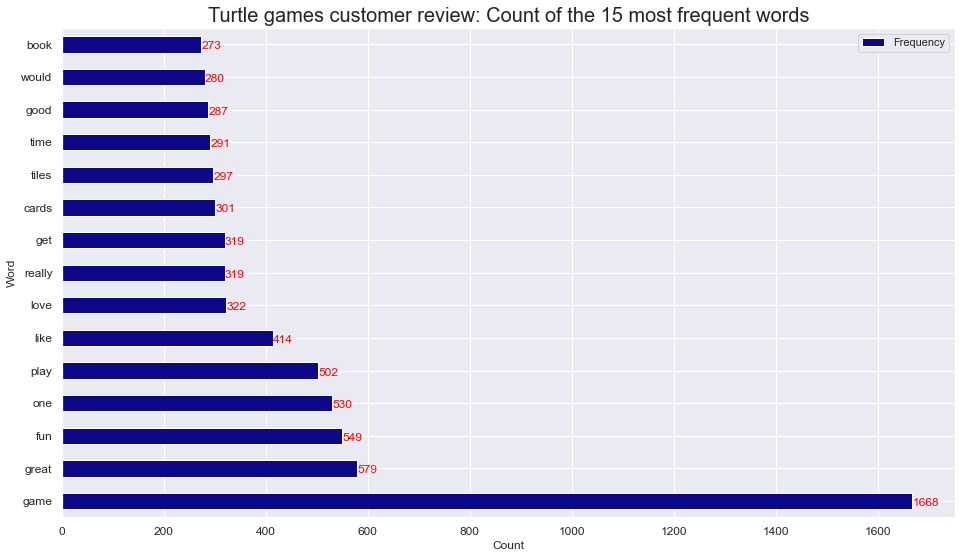

In [54]:
# Visualise the frequency of words in reviews

# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle games customer review: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [59]:
# Calculate the Frequency of most occuring words in summary.

# Create frequency.
fdist_review = FreqDist(tokens2_summary)

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens2_summary).most_common(15),
                      columns=['Word', 'Frequency'])

# Preview data.
counts_summary

,Word,Frequency
0,game,268
1,great,237
2,fun,175
3,good,84
4,love,70
5,like,54
6,kids,48
7,book,42
8,expansion,42
9,cute,40


Note: 

Intentionally did not set the index to "word" as I want to use a 'x-y' framework for the seaborn barchart below.

[Text(0, 0, '268'),
 Text(0, 0, '237'),
 Text(0, 0, '175'),
 Text(0, 0, '84'),
 Text(0, 0, '70'),
 Text(0, 0, '54'),
 Text(0, 0, '48'),
 Text(0, 0, '42'),
 Text(0, 0, '42'),
 Text(0, 0, '40'),
 Text(0, 0, '34'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '28'),
 Text(0, 0, '28')]

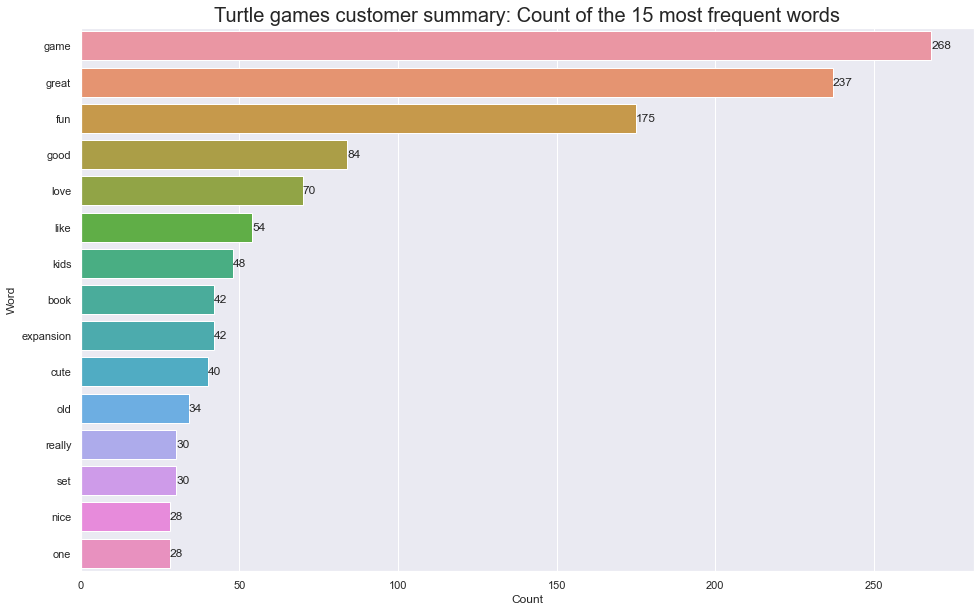

In [61]:
# Visualise the frequenncy of words.

plt.figure(figsize=(16,10))

ax = sns.barplot(data = counts_summary, x = 'Frequency', y = 'Word')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle games customer summary: Count of the 15 most frequent words",
             fontsize=20)

ax.bar_label(ax.containers[0])

### e. calculate polarity of words (20 most positive and 20 most negative)

In [63]:
# Import the necessary package.
from textblob import TextBlob

# Define a function to extract a polarity score for the comment/reviews/summary.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
reviews['polarity'] = reviews['review'].apply(generate_polarity)

# Preview the result.
reviews['polarity'].head()

/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_65021/1572908533.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['polarity'] = reviews['review'].apply(generate_polarity)


0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

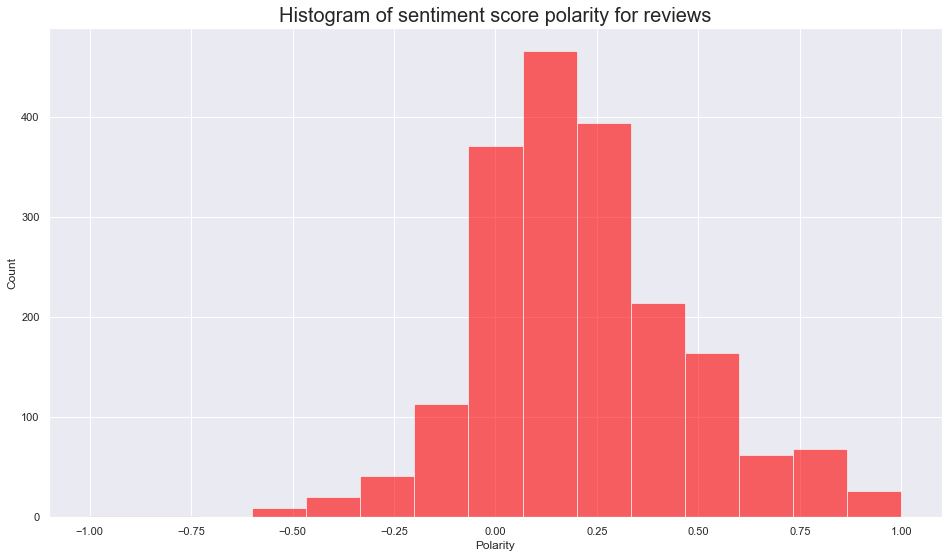

In [65]:
# Visualise the Polarity of reviews.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=20)

plt.show();

In [66]:
# Calculate polarity for summary.

# Populate a new column with polarity scores for each comment.
summary['polarity'] = summary['summary'].apply(generate_polarity)

# Preview the result.
summary['polarity'].head()

/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_65021/4008602883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary['polarity'] = summary['summary'].apply(generate_polarity)


0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

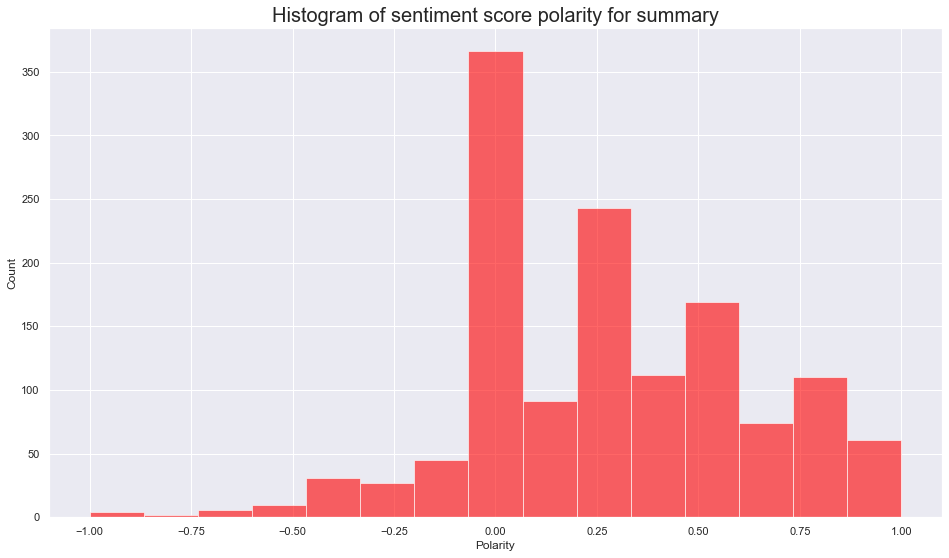

In [67]:
# Visualise the Polarity of summary.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(summary['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summary', fontsize=20)

plt.show();

### f. Display the most positive and negative comments for reviews and summarise them.

In [70]:
# Create a DataFrame containing positive reviews.
positive_reviews = reviews.nlargest(20, 'polarity')

positive_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

,index,review,summary,tokens_review,polarity
7,7,came in perfect condition,five stars,"['came', 'in', 'perfect', 'condition']",1.000000
164,165,awesome book,five stars,"['awesome', 'book']",1.000000
193,194,awesome gift,five stars,"['awesome', 'gift']",1.000000
489,496,excellent activity for teaching selfmanagement skills,five stars,"['excellent', 'activity', 'for', 'teaching', 'selfmanagement', 'skills']",1.000000
517,524,perfect just what i ordered,five stars,"['perfect', 'just', 'what', 'i', 'ordered']",1.000000
583,591,wonderful product,five stars,"['wonderful', 'product']",1.000000
601,609,delightful product,five stars,"['delightful', 'product']",1.000000
613,621,wonderful for my grandson to learn the resurrection story,five stars,"['wonderful', 'for', 'my', 'grandson', 'to', 'learn', 'the', 'resurrection', 'story']",1.000000
782,790,perfect,aquire game,['perfect'],1.000000
922,933,awesome,five stars,['awesome'],1.000000


Observation:
- Customers highly satisfied with the product
- is what he expected and more
- often the comment matches the summary (e.g., 'One of the best boardgames I played in a long time', five stars).

In [71]:
# Create a DataFrame containing positive reviews.
negative_reviews = reviews.nsmallest(20, 'polarity')

# Set style
negative_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

,index,review,summary,tokens_review,polarity
207,208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am,"['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not']",-1.000000
181,182,incomplete kit very disappointing,incomplete kit,"['incomplete', 'kit', 'very', 'disappointing']",-0.780000
1766,1804,im sorry i just find this product to be boring and to be frank juvenile,disappointing,"['im', 'sorry', 'i', 'just', 'find', 'this', 'product', 'to', 'be', 'boring', 'and', 'to', 'be', 'frank', 'juvenile']",-0.583333
362,364,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,anger control game,"['one', 'of', 'my', 'staff', 'will', 'be', 'using', 'this', 'game', 'soon', 'so', 'i', 'dont', 'know', 'how', 'well', 'it', 'works', 'as', 'yet', 'but', 'after', 'looking', 'at', 'the', 'cards', 'i', 'believe', 'it', 'will', 'be', 'helpful', 'in', 'getting', 'a', 'conversation', 'started', 'regarding', 'anger', 'and', 'what', 'to', 'do', 'to', 'control', 'it']",-0.550000
116,117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,stickers,"['i', 'bought', 'this', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'grandson', 'its', 'a', 'sticker', 'book', 'so', 'how', 'can', 'i', 'go', 'wrong', 'with', 'this', 'gift']",-0.500000
226,227,this was a gift for my daughter i found it difficult to use,two stars,"['this', 'was', 'a', 'gift', 'for', 'my', 'daughter', 'i', 'found', 'it', 'difficult', 'to', 'use']",-0.500000
229,230,i found the directions difficult,three stars,"['i', 'found', 'the', 'directions', 'difficult']",-0.500000
289,290,instructions are complicated to follow,two stars,"['instructions', 'are', 'complicated', 'to', 'follow']",-0.500000
300,301,difficult,three stars,['difficult'],-0.500000
1496,1524,expensive for what you get,two stars,"['expensive', 'for', 'what', 'you', 'get']",-0.500000


Observation: 

From the negative review, the following can be understood about customer' sentiments towards Turtle Games products.
- Boring
- Too difficult to use (over-complex instruction or rules), not appropriate for designed age range.
- However, limiation of our model, as there seems to be discrepencies between the review comment and the polarity score. E.g., ' was a gift for my son he loves the game, given five stars but a polarity of -0.400